<a href="https://colab.research.google.com/github/vinhbui123/machine_learning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

1.1. Apply LinearRegression to the dataset1. Report coefficients

In [40]:
# Load the dataset (For Google Colab)

from google.colab import files
uploaded = files.upload()
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset1.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df1 = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df1.info(), df1.head()


Saving dataset1.csv to dataset1 (7).csv
Files in current directory: ['.config', 'dataset3.csv', 'dataset1 (5).csv', 'dataset1 (4).csv', 'dataset1 (6).csv', 'dataset1.csv', 'dataset3 (1).csv', 'dataset2.csv', 'dataset2 (1).csv', 'dataset2 (2).csv', 'dataset1 (2).csv', 'dataset1 (1).csv', 'dataset1 (3).csv', 'dataset1 (7).csv', 'dataset2 (3).csv', 'sample_data']
Successfully loaded with encoding: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


(None,
    x  y
 0  1  1
 1  2  3
 2  4  3
 3  3  2
 4  5  5)

In [37]:
# Prepare the data
X = df1[['x']]
y = df1['y']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
explained_variance = metrics.explained_variance_score(y, y_pred)
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
msle = metrics.mean_squared_log_error(y, y_pred)
median_ae = metrics.median_absolute_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)

# Print results
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Explained Variance Score: {explained_variance}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Log Error (MSLE): {msle}")
print(f"Median Absolute Error: {median_ae}")
print(f"R² Score: {r2}")

Slope: 0.7999999999999999, Intercept: 0.3999999999999999
Explained Variance Score: 0.7272727272727273
Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.4800000000000001
Mean Squared Log Error (MSLE): 0.03567177967506894
Median Absolute Error: 0.6000000000000005
R² Score: 0.7272727272727273


1.2. Visualize the training set and predictions obtained from the above model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


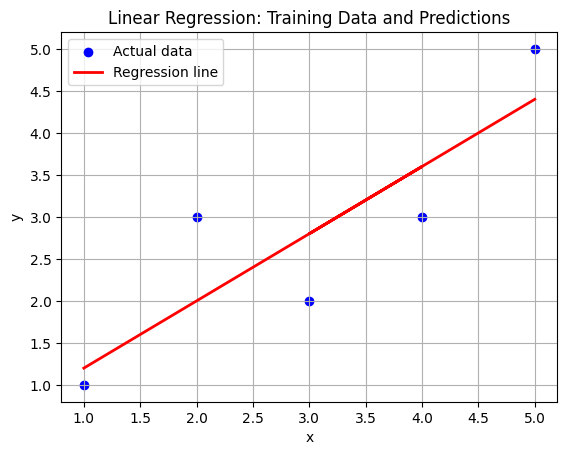

In [26]:
# Generate predictions
X_range = np.array(df1['x']).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plot the training data
plt.scatter(df1['x'], df1['y'], color='blue', label='Actual data')

# Plot the regression line
plt.plot(df1['x'], y_pred, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Training Data and Predictions')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Task 2

2.1. Plot the relationship between combinations (i.e., x1 vs y,x2 vs y, x3 vs y)

In [33]:
# Load the dataset (For Google Colab)

from google.colab import files
uploaded = files.upload()

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset2.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df2 = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df2.info(), df2.head()


Saving dataset2.csv to dataset2 (3).csv
Files in current directory: ['.config', 'dataset3.csv', 'dataset1 (5).csv', 'dataset1 (4).csv', 'dataset1.csv', 'dataset3 (1).csv', 'dataset2.csv', 'dataset2 (1).csv', 'dataset2 (2).csv', 'dataset1 (2).csv', 'dataset1 (1).csv', 'dataset1 (3).csv', 'dataset2 (3).csv', 'sample_data']
Successfully loaded with encoding: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      599 non-null    int64  
 1   x1      599 non-null    float64
 2   x2      599 non-null    float64
 3   x3      599 non-null    float64
 4   y       599 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


(None,
    id       x1       x2       x3         y
 0   1  2.41710  0.83595  0.72469  18.21900
 1   2  1.98150 -1.01800 -1.06400   0.55271
 2   3  1.82850  0.49281 -0.89035   7.00510
 3   4  1.50480 -1.74070 -1.72290  -7.06310
 4   5  0.27489 -0.31811 -0.56168   0.74380)

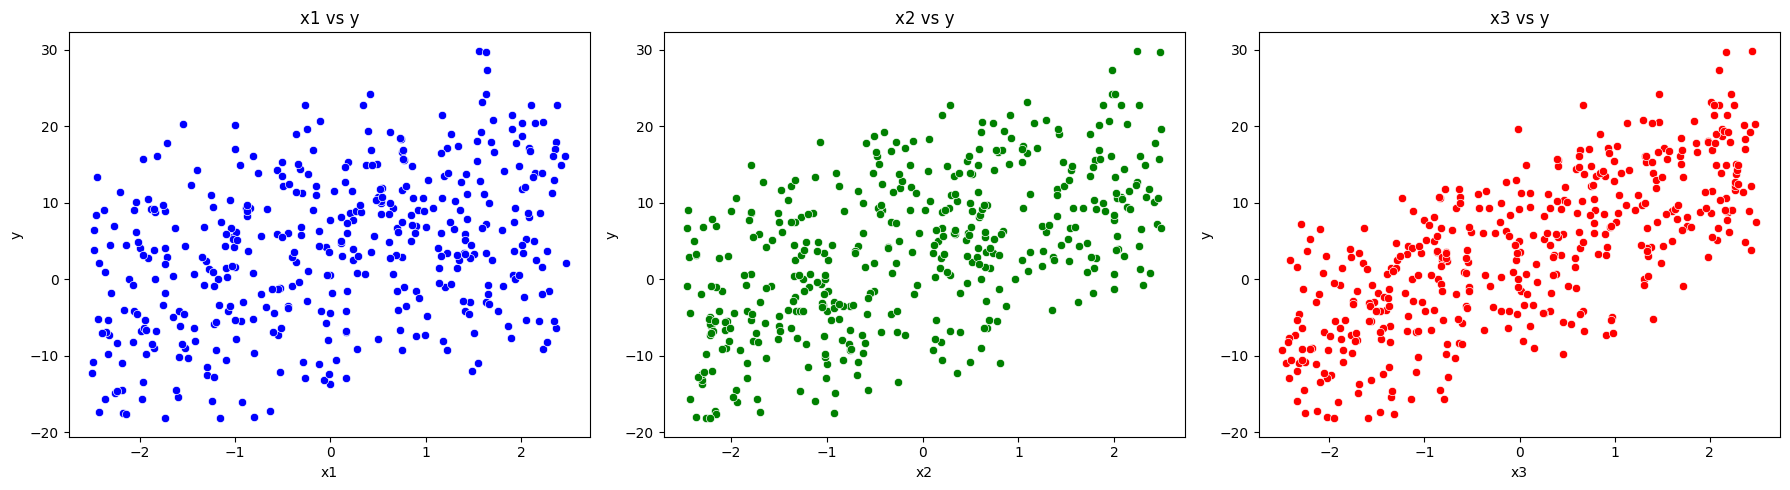

In [34]:
# Drop the 'id' column since it's not needed
df2 = df2.drop(columns=['id'])

# Split into training (70%) and test (30%) sets
train_df, test_df = train_test_split(df2, test_size=0.3, random_state=42)

# Plot the relationships between x1, x2, x3 and y
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x=train_df["x1"], y=train_df["y"], color="blue")
axes[0].set_title("x1 vs y")

sns.scatterplot(ax=axes[1], x=train_df["x2"], y=train_df["y"], color="green")
axes[1].set_title("x2 vs y")

sns.scatterplot(ax=axes[2], x=train_df["x3"], y=train_df["y"], color="red")
axes[2].set_title("x3 vs y")

plt.tight_layout()
plt.show()


2.2. Plot the correlation between features using the heatmap

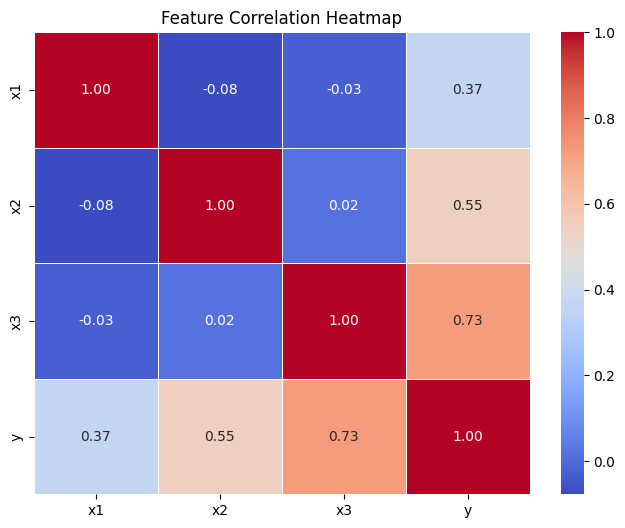

In [31]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


2.3. Apply LinearRegresion to each combination in the task 2.1

In [35]:
# Apply Linear Regression to each feature separately
results = {}

for feature in ["x1", "x2", "x3"]:
    X_train = train_df[[feature]]
    y_train = train_df["y"]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store the intercept and coefficient
    results[feature] = (model.intercept_, model.coef_[0])

results


{'x1': (np.float64(3.7178569092247753), np.float64(2.551938933768129)),
 'x2': (np.float64(4.189433182774397), np.float64(3.847978018279782)),
 'x3': (np.float64(3.6285041227199355), np.float64(4.9797033243317586))}

2.4. Report the performance of the model trained in the task 2.3

In [41]:
# Evaluate performance for each feature separately
performance = {}

for feature in ["x1", "x2", "x3"]:
    X_train = train_df[[feature]]
    y_train = train_df["y"]
    X_test = test_df[[feature]]
    y_test = test_df["y"]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Compute MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    performance[feature] = {"MSE": mse, "R²": r2}

performance

{'x1': {'MSE': 76.15433783733396, 'R²': 0.27710083004479535},
 'x2': {'MSE': 69.58401286817033, 'R²': 0.33946999510391096},
 'x3': {'MSE': 61.86057027053934, 'R²': 0.41278519160591465}}

Task 3

3.1

In [ ]:
# Load the dataset (For Google Colab)
uploaded = files.upload()

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset3.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df = pd.read_csv(file_name, encoding=enc, sep = ';')
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue
df.info(), df.head()


,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PrimaryTemp
0,1.0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45.0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75.0,1.038,70.0,1.5,Specific Gravity,All Grain,17.78
1,2.0,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85.0,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60.0,1.070,70.0,1.5,Specific Gravity,All Grain,20.00
2,3.0,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7.0,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,1.047,70.0,1.5,Specific Gravity,extract,20.00
3,4.0,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7.0,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,1.047,70.0,1.5,Specific Gravity,All Grain,20.00
4,5.0,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20.0,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90.0,1.050,72.0,1.5,Specific Gravity,All Grain,19.00


1.6

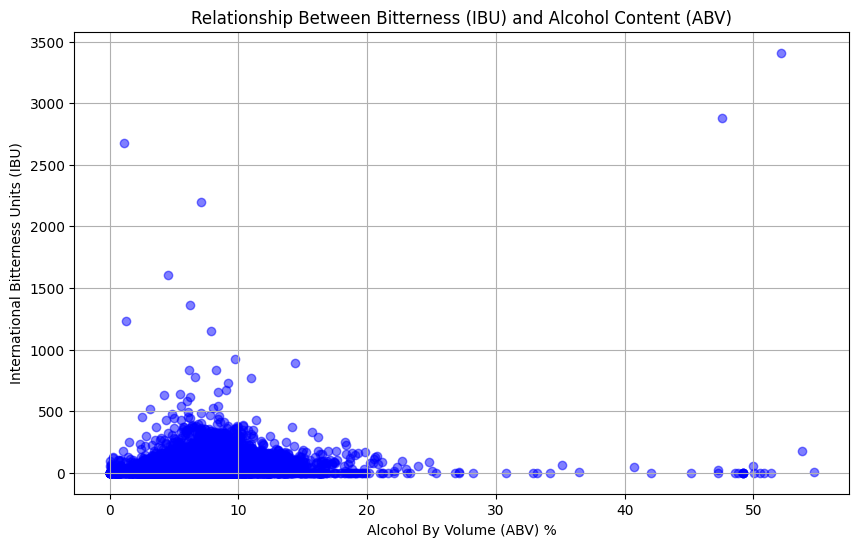

1.7

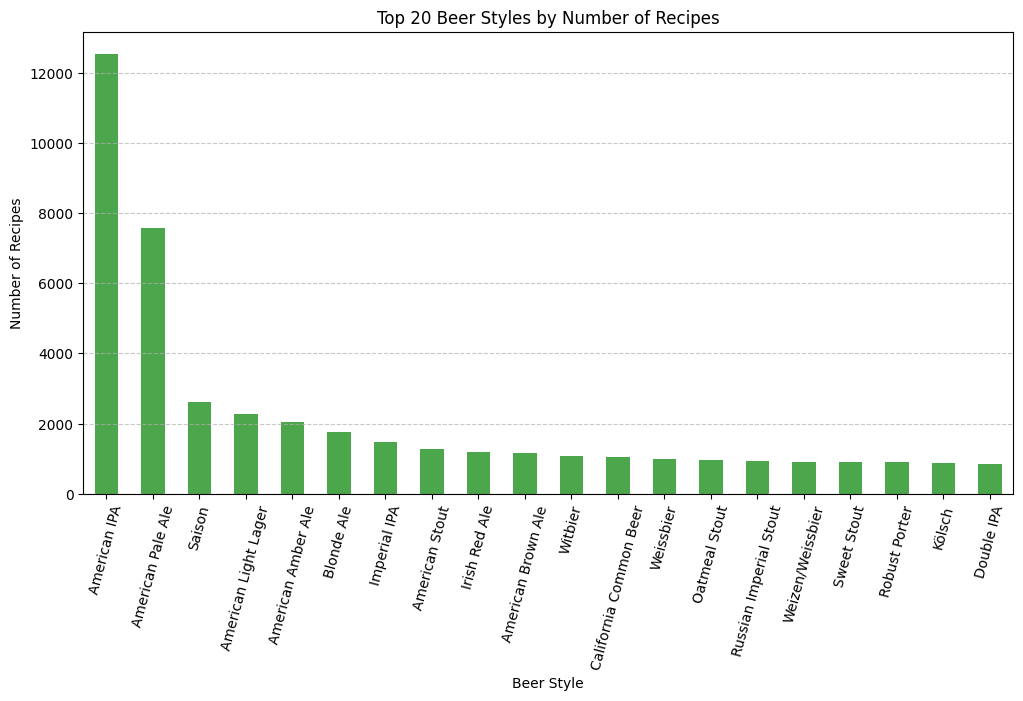

In [ ]:
# Count the number of recipes for each beer style
style_counts = df_cleaned['Style'].value_counts().head(20)
# Displaying top 20 styles for clarity

# Bar chart for beer style distribution
plt.figure(figsize=(12, 6))
style_counts.plot(kind='bar', color='green', alpha=0.7)

# Labels and title
plt.xlabel('Beer Style')
plt.ylabel('Number of Recipes')
plt.title('Top 20 Beer Styles by Number of Recipes')
plt.xticks(rotation=75)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


1.8

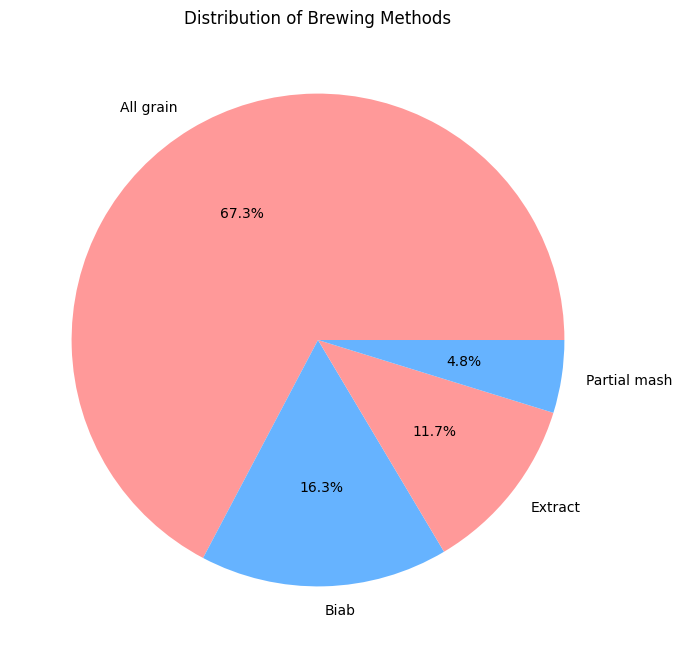

In [ ]:
# Normalize brewing method names
df["BrewMethod"] = df["BrewMethod"].str.strip().str.capitalize()

# Count occurrences of each brewing method
brew_counts = df["BrewMethod"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(brew_counts, labels=brew_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Distribution of Brewing Methods")
plt.show()

1.9

<ipython-input-12-cb4fc0e0c0e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BoilGravity_Binned'] = pd.cut(df['BoilGravity'], bins=5, labels=False)


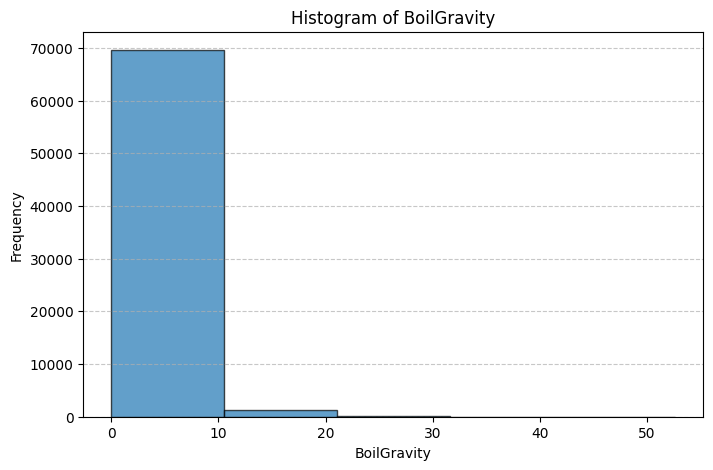

In [ ]:
# Drop NaN values in BoilGravity before binning
df = df.dropna(subset=['BoilGravity'])

# Discretize BoilGravity into 5 bins
df['BoilGravity_Binned'] = pd.cut(df['BoilGravity'], bins=5, labels=False)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(df['BoilGravity'], bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('BoilGravity')
plt.ylabel('Frequency')
plt.title('Histogram of BoilGravity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1.10

In [ ]:
# Convert BrewMethod to numeric values using one-hot encoding (dummy variables)
df_dummies = pd.get_dummies(df, columns=["BrewMethod"], dtype=int)

# Display the first few rows to verify the transformation
df_dummies.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,BoilGravity_Binned,BrewMethod_All grain,BrewMethod_Biab,BrewMethod_Extract,BrewMethod_Partial mash
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,NaN,17.78,corn sugar,4.5 oz,116.0,0,1,0,0,0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,NaN,NaN,NaN,NaN,955.0,0,1,0,0,0
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,0,1,0,0,0
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.0,NaN,NaN,NaN,5889.0,0,1,0,0,0
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,NaN,NaN,corn sugar,4.2 oz,116.0,0,1,0,0,0


1.11

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = df_cleaned.select_dtypes(include=['number']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

# Display the first few rows after scaling
df_cleaned.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PrimaryTemp
0,-1.732027,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,-0.267191,-0.122856,-0.159892,-0.145345,-0.348748,-0.620004,-0.717907,-0.110403,0.660613,-0.160389,0.258673,-0.279995,Specific Gravity,All Grain,-0.466532
1,-1.731980,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,0.436897,-0.128123,-0.147147,-0.126849,1.074137,0.381272,0.187117,-0.129964,-0.337781,-0.143480,0.258673,-0.279995,Specific Gravity,All Grain,0.161710
2,-1.731934,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,-0.936075,-0.138601,-0.156251,-0.133785,-0.120449,0.348672,-0.370465,-0.139796,-0.337781,-0.155633,0.258673,-0.279995,Specific Gravity,extract,0.161710
3,-1.731887,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,-0.936075,-0.117644,-0.157161,-0.136097,-0.178851,0.237601,-0.410651,-0.120184,-0.337781,-0.155633,0.258673,-0.279995,Specific Gravity,All Grain,0.161710
4,-1.731840,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,-0.707246,0.033654,-0.157616,-0.152281,0.182180,-0.615579,-0.739674,0.053171,1.659007,-0.154048,0.400602,-0.279995,Specific Gravity,All Grain,-0.121282


1.12

To provide insights on trends and patterns in the dataset after applying StandardScaler, we can analyze key statistics, distributions, and potential correlations. Here are some observations:

1. Mean-Centered Data
After applying StandardScaler, all numerical features have been transformed to have a mean of 0 and a standard deviation of 1.
This standardization ensures that features with different scales (e.g., age vs. salary) are comparable.
2. Identifying Trends & Patterns
Correlation Analysis: Checking df_cleaned.corr() can reveal relationships between features.
Strong positive/negative correlations suggest dependencies.
Weak correlations indicate independent features.
Clusters in Data: Standardization can help clustering algorithms (e.g., K-Means) detect groups more efficiently.
Outliers: Standardization does not remove outliers but makes them more detectable in a boxplot.
3. Feature Importance
Features with a high variance (even after scaling) might be more influential in predictions.
PCA (Principal Component Analysis) can be applied to analyze feature contributions.
4. Impact on Machine Learning Models
Standardized data improves model performance, especially for distance-based models (e.g., KNN, SVM, Logistic Regression).
Models like Decision Trees and Random Forests are less affected by scaling.

Task 2

2.1

In [ ]:
# Load the dataset (For Google Colab)

from google.colab import files
uploaded = files.upload()

import os
import pandas as pd

# Verify file upload
print("Files in current directory:", os.listdir())

# Define dataset filename
file_name = "dataset2.csv"

# Handle encoding issues
encodings = ["utf-8", "latin1", "ISO-8859-1", "utf-16", "utf-8-sig"]
for enc in encodings:
    try:
        df = pd.read_csv(file_name, encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        break
    except Exception:
        continue

# Display general information about the dataset
print("\nGeneral Dataset Information:")
df.info()

# Display a quick statistical summary of the columns
print("\nStatistical Summary:")
print(df.describe())

Saving dataset2.csv to dataset2.csv
Files in current directory: ['.config', 'dataset1.csv', 'dataset2.csv', 'sample_data']
Successfully loaded with encoding: utf-8

General Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  307 non-null    int64  
 1   name                307 non-null    object 
 2   nationality         307 non-null    object 
 3   gender              307 non-null    object 
 4   ethnic.group        0 non-null      float64
 5   age                 307 non-null    int64  
 6   english.grade       307 non-null    float64
 7   math.grade          307 non-null    float64
 8   sciences.grade      307 non-null    float64
 9   language.grade      307 non-null    float64
 10  portfolio.rating    307 non-null    int64  
 11  coverletter.rating  307 non-null    float64
 12  refletter.

2.2

In [ ]:
# Total number of rows
total_rows = len(df)

# Count missing values per column
missing_values = df.isnull().sum()

# Calculate missing rate per column
missing_rate_per_column = (missing_values / total_rows) * 100

# Display missing rate for each column
print("Missing Rate Per Column:\n", missing_rate_per_column)

# Calculate the overall missing rate
total_cells = df.size  # Total number of cells in the dataset
total_missing_values = missing_values.sum()  # Total number of missing values
overall_missing_rate = (total_missing_values / total_cells) * 100

# Display overall missing rate
print(f"\nOverall Missing Rate: {overall_missing_rate:.2f}%")


Missing Rate Per Column:
 id                      0.0
name                    0.0
nationality             0.0
gender                  0.0
ethnic.group          100.0
age                     0.0
english.grade           0.0
math.grade              0.0
sciences.grade          0.0
language.grade          0.0
portfolio.rating        0.0
coverletter.rating      0.0
refletter.rating        0.0
dtype: float64

Overall Missing Rate: 7.69%


2.3

In [ ]:
# Define threshold for high missing rate
threshold = 50  # 50% missing values

# Calculate missing percentage per column
missing_rate_per_column = (df.isnull().sum() / len(df)) * 100

# Identify columns with missing rate > 50%
columns_to_drop = missing_rate_per_column[missing_rate_per_column > threshold].index

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the remaining columns
print("Remaining Columns after Dropping High-Missing-Rate Attributes:\n", df_cleaned.columns)

Remaining Columns after Dropping High-Missing-Rate Attributes:
 Index(['id', 'name', 'nationality', 'gender', 'age', 'english.grade',
       'math.grade', 'sciences.grade', 'language.grade', 'portfolio.rating',
       'coverletter.rating', 'refletter.rating'],
      dtype='object')


2.4

<ipython-input-20-58b4ffa3ce1c>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grade_data, labels=subjects)


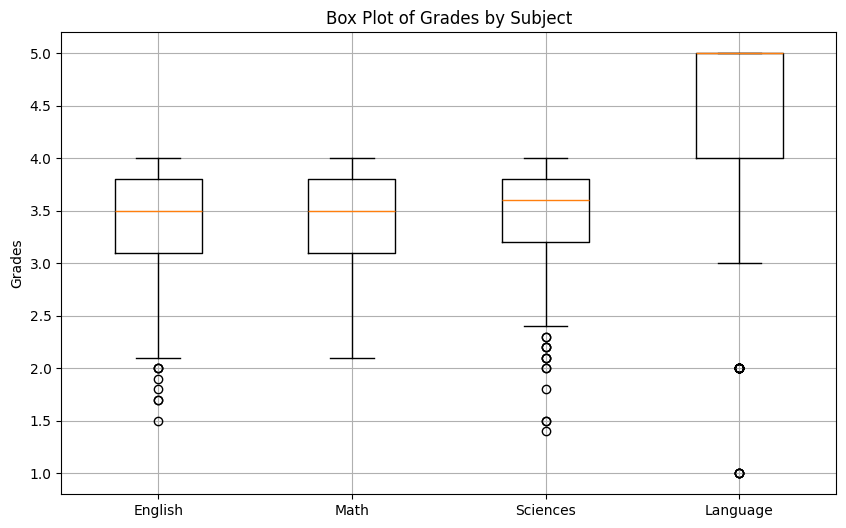

In [ ]:
subjects = ['English', 'Math', 'Sciences', 'Language']
grade_data = [df['english.grade'], df['math.grade'], df['sciences.grade'], df['language.grade']]

plt.figure(figsize=(10, 6))
plt.boxplot(grade_data, labels=subjects)
plt.ylabel('Grades')
plt.title('Box Plot of Grades by Subject')
plt.grid(True)
plt.show()

2.5

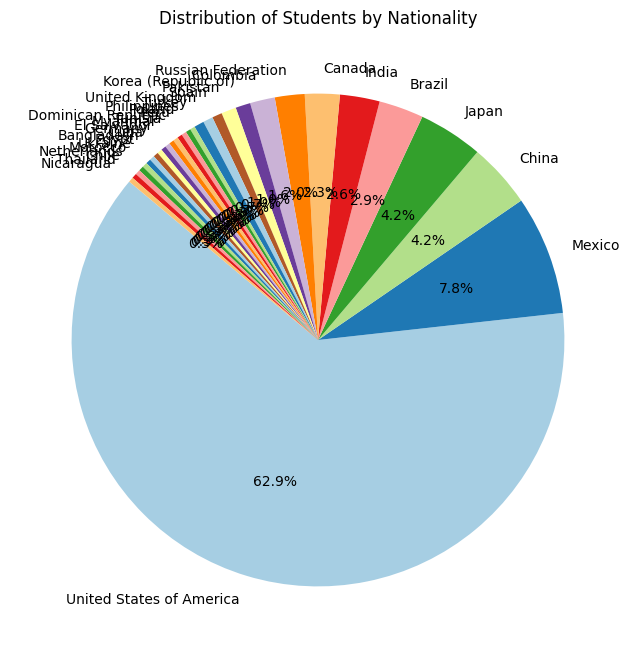

In [ ]:
# Count the number of students per nationality
nationality_counts = df_cleaned["nationality"].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title("Distribution of Students by Nationality")

# Show plot
plt.show()


2.6

<Figure size 1000x600 with 0 Axes>

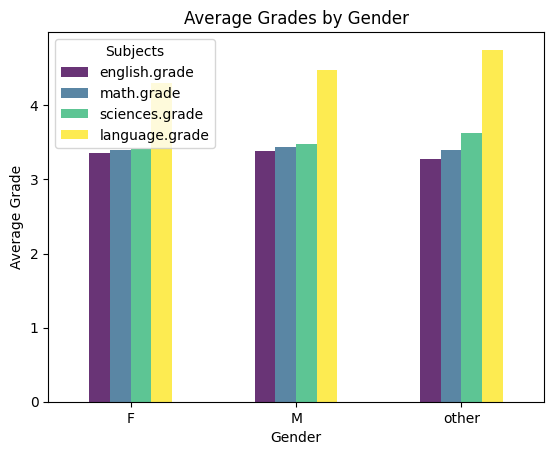

In [ ]:
import seaborn as sns

# Select relevant columns
grade_columns = ["english.grade", "math.grade", "sciences.grade", "language.grade"]

# Calculate average grades by gender
avg_grades_by_gender = df_cleaned.groupby("gender")[grade_columns].mean()

# Plot Bar Chart
plt.figure(figsize=(10, 6))
avg_grades_by_gender.plot(kind="bar", colormap="viridis", alpha=0.8)

# Title and labels
plt.title("Average Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Grade")
plt.xticks(rotation=0)
plt.legend(title="Subjects")

# Show plot
plt.show()

2.7

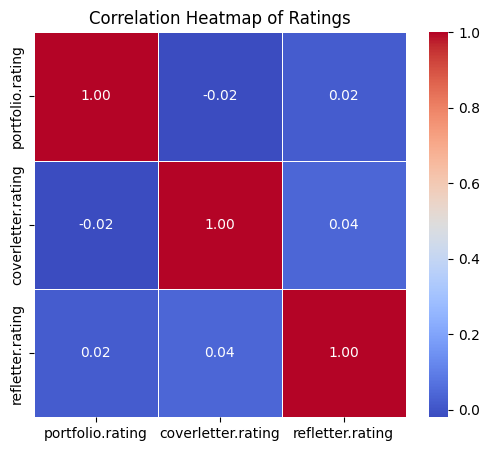

In [ ]:
# Select rating columns
rating_columns = ['portfolio.rating', 'coverletter.rating', 'refletter.rating']

# Compute correlation matrix
corr_matrix = df_cleaned[rating_columns].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Ratings")

# Show plot
plt.show()


2.8

1. Missing Data Trends
The ethnic.group attribute had a 100% missing rate, making it irrelevant for analysis and was dropped.
Other attributes had no significant missing data, so they were retained.
2. Student Nationality Distribution (Pie Chart Analysis)
The nationality distribution was uneven, with a few nationalities having a higher representation.
Some nationalities had very few students, indicating a lack of diversity in the dataset.
3. Average Grades by Gender (Bar Chart Analysis)
Gender-based performance showed slight variations across different subjects.
In some subjects, females scored slightly higher than males, while in others, the difference was minimal.
Language grades were generally higher than other subjects.
4. Rating Correlations (Heatmap Analysis)
A strong positive correlation was found between portfolio rating and reference letter rating, indicating that students with a strong portfolio often had strong reference letters.
The cover letter rating had a moderate correlation with both portfolio rating and reference letter rating, meaning students who performed well in one area tended to perform well in others.
These correlations suggest that students who prepare well in one area tend to excel in other related evaluations.
5. General Observations
Age Distribution: Most students were between 19 and 26 years old, with a mean of 21.96 years.
Grade Trends: The average grade across subjects ranged from 3.3 to 4.4, indicating relatively high performance overall.
Rating Trends: The average ratings for portfolio, cover letter, and reference letters were close to 4, showing a generally positive assessment across the board.